Friend suggestions for Alice: set()
Ranked friend suggestions for Alice: []


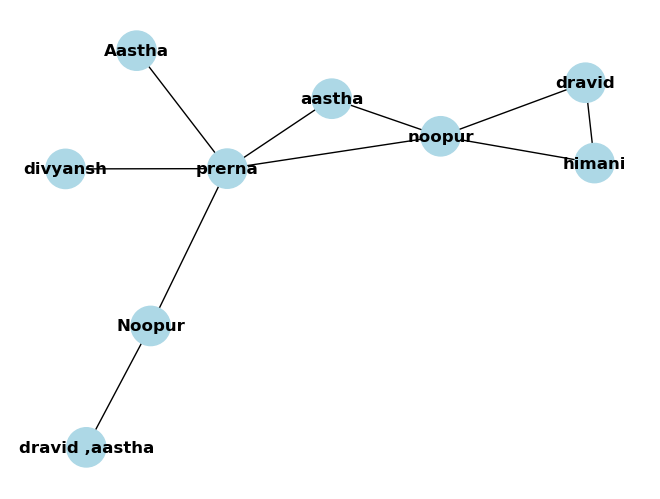

In [2]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Define the social network graph
graph = {
    'Noopur': ['prerna', 'dravid ,aastha'],
    'prerna': ['Aastha', 'noopur','divyansh'],
    'dravid': ['noopur', 'himani'],
    'aastha': ['noopur','prerna'],
    'himani': ['dravid','noopur']
}

# Friend suggestion function using BFS
def suggest_friends(graph, user):
    visited = set()
    queue = deque()
    queue.append((user, 0))
    visited.add(user)
    suggestions = set()

    while queue:
        current_user, distance = queue.popleft()

        if distance == 2:
            if current_user not in graph[user]:
                suggestions.add(current_user)
        elif distance < 2:
            for friend in graph.get(current_user, []):
                if friend not in visited:
                    visited.add(friend)
                    queue.append((friend, distance + 1))

    return suggestions

# Ranked friend suggestion function
def suggest_friends_ranked(graph, user):
    user_friends = set(graph.get(user, []))
    suggestions = {}

    for friend in user_friends:
        for fof in graph.get(friend, []):
            if fof != user and fof not in user_friends:
                suggestions[fof] = suggestions.get(fof, 0) + 1

    ranked = sorted(suggestions.items(), key=lambda x: x[1], reverse=True)
    return ranked

# Visualization function
def draw_graph(graph, user=None, suggestions=None):
    G = nx.Graph()

    for person, friends in graph.items():
        for friend in friends:
            G.add_edge(person, friend)

    pos = nx.spring_layout(G)

    node_colors = []
    for node in G.nodes():
        if node == user:
            node_colors.append('green')
        elif suggestions and node in suggestions:
            node_colors.append('orange')
        else:
            node_colors.append('lightblue')

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=12, font_weight='bold')
    plt.show()

# Test the functions and visualize
user = 'Noopur'

suggestions = suggest_friends(graph, user)
ranked_suggestions = suggest_friends_ranked(graph, user)

print(f"Friend suggestions for {user}: {suggestions}")
print(f"Ranked friend suggestions for {user}: {ranked_suggestions}")

draw_graph(graph, user=user, suggestions=suggestions)
